### Comparison plots for categorical case

In [1]:
import numpy as np
from numpy import random
import random
from numpy.random import uniform, choice
import math
np.random.seed(90)
random.seed(2019)

In [2]:
## load the functions
%run -i framework-cat.py

In [3]:
# Global parameters
import itertools
number_of_ite = 20
number_of_rounds = 5000
probs = [[0.7,0.15,0.15]]*6 + [[0.5,0.25,0.25]]*3  # D1
#probs = [[0.1,0.45,0.45]] +[[0.7,0.15,0.15]]*5 + [[0.5,0.25,0.25]]*3  # D2
#probs = [[0.7,0.15,0.15]]*6 + [[0.5,0.25,0.25]]*2 +  [[0.8,0.1,0.1]] # D3
vals = [[0]+list(np.random.normal(loc=0.1*k, scale=0.03, size=2)) for k in range(1,10)]  # D1
N = 9
K = 3
C = 3
narms = 84
sets = [set(i) for i in itertools.combinations(range(N), K)]

In [4]:
# data
dataset = []
for i in range(number_of_ite):
    dataset.append(generate_data(number_of_rounds, probs, vals))

In [5]:
## MAB base arms values
rewards = []
def reward(s, p, v):
    s = np.sort(s)[::-1]
    p = np.array([p[i] for i in s]).flatten()
    v = np.array([v[i] for i in s]).flatten()
    index = np.argsort(v)[::-1]
    r = p[index[0]] * v[index[0]]
    fac = 1
    for k in range(1,len(index)):
        fac = fac * (1 - p[index[k-1]])
        r += fac * p[index[k]] * v[index[k]]
    return r
for i in sets:
    rewards.append(reward(list(i), probs, vals))

**Model training for algorithms**

In [6]:
# training
res_b = []
res_m = []
res_s = []
for i in range(number_of_ite):
    model_b = baseUCB(number_of_rounds, narms, rewards)   ## MAB algorithm
    model_m = modiCUCB(number_of_rounds,N,C,K)  ## Our algorithm
    model_s = semiCUCB(number_of_rounds,N,C,K)  ## Semi-bandit algorithm
    data = dataset[i]
    for t in range(1, number_of_rounds):
        model_b.ucb_round(t,data, sets, rewards)   
        model_m.kmax_round(t,data, probs, vals)
        model_s.kmax_round_semi(t,data, probs, vals) 
    res_b.append(model_b.regrets)
    res_m.append(model_m.regrets)
    res_s.append(model_s.regrets)

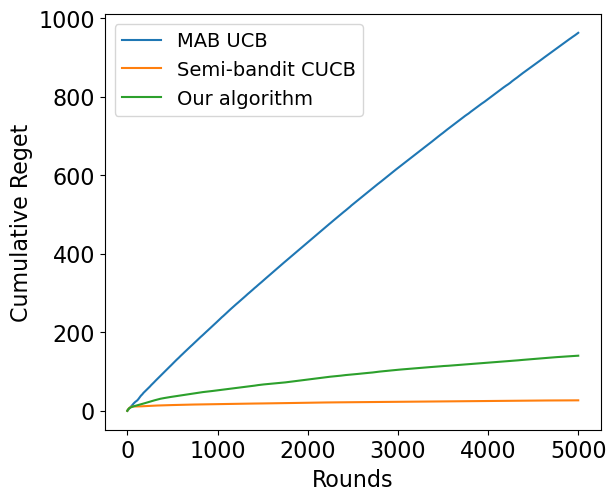

In [7]:
import matplotlib.pyplot as plt
regrets_b = np.cumsum(res_b, axis = 1)
regrets_m = np.cumsum(res_m, axis = 1)
regrets_s = np.cumsum(res_s, axis = 1)
mean_regrets_b = np.mean(regrets_b, axis = 0)
mean_regrets_m = np.mean(regrets_m, axis = 0)
mean_regrets_s = np.mean(regrets_s, axis = 0)
plt.figure(figsize=(6.4, 5.4))
plt.plot(mean_regrets_b, label = 'MAB UCB')
plt.plot(mean_regrets_s, label = 'Semi-bandit CUCB')
plt.plot(mean_regrets_m, label = 'Our algorithm')
# add legends
plt.legend(fontsize=14, loc=2)
plt.ylabel("Cumulative Reget", fontsize= 16)
plt.xlabel("Rounds", fontsize= 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize= 16)
plt.show()